In [2]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np

<h1> Line Plot

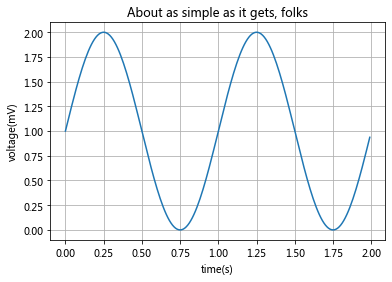

In [4]:
t = np.arange(0, 2, 0.01)
s = 1 + np.sin(2 * np.pi * t)

fig, ax = plt.subplots()
ax.plot(t, s)

ax.set(xlabel="time(s)", ylabel="voltage(mV)", title="About as simple as it gets, folks")
ax.grid()

# fig.savefig("test.png")
# plt.show()


<h1> Multiple subplots in one figure

Text(0, 0.5, 'Undamper')

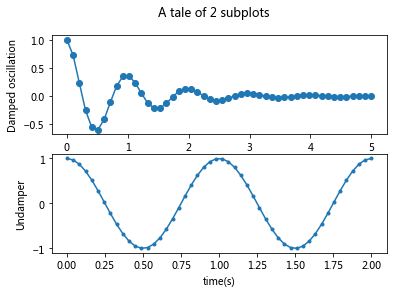

In [7]:
x1 = np.linspace(0, 5)
x2 = np.linspace(0, 2)

y1 = np.cos(2 * np.pi * x1) * np.exp( - x1)
y2 = np.cos(2 * np.pi * x2)

fig, (ax1, ax2) = plt.subplots(2,1)
fig.suptitle("A tale of 2 subplots")

ax1.plot(x1, y1, "o-")
ax1.set_ylabel("Damped oscillation")

ax2.plot(x2, y2, ".-")
ax2.set_xlabel("time(s)")
ax2.set_ylabel("Undamper")

# plt.show()

<h2> Alternative Method For Creating Multiple Plots

Text(0, 0.5, 'Undamped')

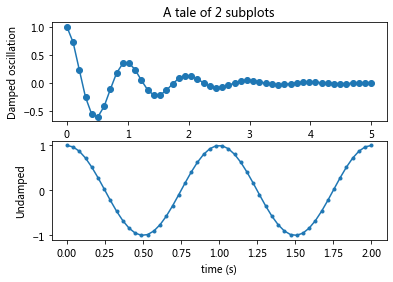

In [8]:
x1 = np.linspace(0.0, 5.0)
x2 = np.linspace(0.0, 2.0)

y1 = np.cos(2 * np.pi * x1) * np.exp(-x1)
y2 = np.cos(2 * np.pi * x2)

plt.subplot(2, 1, 1)
plt.plot(x1, y1, 'o-')
plt.title('A tale of 2 subplots')
plt.ylabel('Damped oscillation')

plt.subplot(2, 1, 2)
plt.plot(x2, y2, '.-')
plt.xlabel('time (s)')
plt.ylabel('Undamped')

# plt.show()

<h1> Image

In [9]:
import matplotlib.cbook as cbook
from matplotlib.path import Path
from matplotlib.patches import PathPatch
import matplotlib.cm as cm

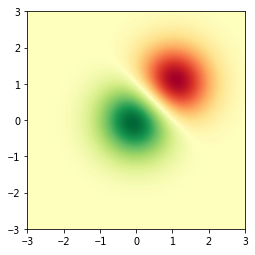

In [10]:
np.random.seed(19680801)
delta = 0.025
x = y = np.arange(-3, 3, delta)
X, Y = np.meshgrid(x, y)
Z1 = np.exp(- X**2 - Y**2)
Z2 = np.exp(-(X - 1) ** 2- (Y - 1) ** 2)
Z = (Z1 - Z2) * 2

fig, ax = plt.subplots()
img = ax.imshow(Z, interpolation="bilinear", cmap=cm.RdYlGn,
origin="lower", extent=[-3, 3, -3, 3], vmax=abs(Z).max(), vmin=
-abs(Z).max())

# plt.show()

For more demos are not supported here.

<h1>pcolormesh</h1>
axes.Axes.pcolormesh allows you to generate 2D image-style plots. Note it is faster than the similar pcolor.

<h2>Basic pcolormesh</h2>
We usually specify a pcolormesh by defining the edge of quadrilaterals and the value of the quadrilateral. Note that here x and y each have one extra element than Z in the respective dimension.

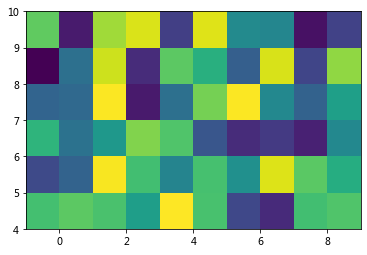

In [23]:
from matplotlib.colors import BoundaryNorm
from matplotlib.ticker import MaxNLocator

np.random.seed(19680801)
Z = np.random.rand(6, 10)
# Shape of Z just according to the interval of x and y.
x = np.arange(-1, 10, 1)  # len = 11
y = np.arange(4, 11, 1)  # len = 7
# If x or y have the same length of both of Z manual as below. 
fig, ax = plt.subplots()
ax.pcolormesh(x, y, Z)

<h2>Non-rectilinear pcolormesh</h2>
Note that we can also specify matrices for X and Y and have non-rectilinear quadrilaterals.

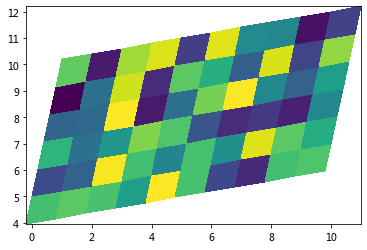

In [27]:
X, Y = np.meshgrid(x, y)
X = X + 0.2 * Y  # tilt the coordinates.
Y = Y + 0.2 * X
# Offset according to the coordinates
fig, ax = plt.subplots()
ax.pcolormesh(X, Y, Z)

<h2>Centered Coordinates</h2>
Often a user wants to pass X and Y with the same sizes as Z to axes.Axes.pcolormesh. This is also allowed if shading='auto' is passed (default set by rcParams["pcolor.shading"] (default: 'flat')). Pre Matplotlib 3.3, shading='flat' would drop the last column and row of Z; while that is still allowed for back compatibility purposes, a DeprecationWarning is raised. If this is really what you want, then simply drop the last row and column of Z manually:

Text(0.5, 1.0, "shading='flat'")

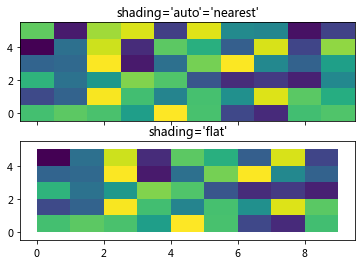

In [28]:
x = np.arange(10)  # len = 10
y = np.arange(6)  # len = 6
X, Y = np.meshgrid(x, y)

fig, axs = plt.subplots(2, 1, sharex=True, sharey=True)
axs[0].pcolormesh(X, Y, Z, vmin=np.min(Z), vmax=np.max(Z), shading='auto')
axs[0].set_title("shading='auto'='nearest'")
axs[1].pcolormesh(X, Y, Z[:-1, :-1], vmin=np.min(Z), vmax=np.max(Z),
                  shading='flat')
axs[1].set_title("shading='flat'")

<h2>Making levels using Norms</h2>
Shows how to combine Normalization and Colormap instances to draw "levels" in axes.Axes.pcolor, axes.Axes.pcolormesh and axes.Axes.imshow type plots in a similar way to the levels keyword argument to contour/contourf.

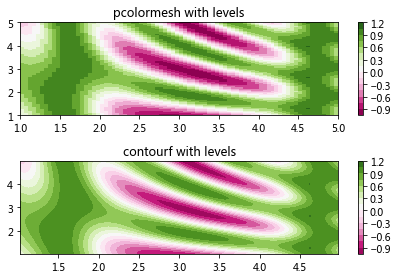

In [30]:
# make these smaller to increase the resolution
dx, dy = 0.05, 0.05

# generate 2 2d grids for the x & y bounds
y, x = np.mgrid[slice(1, 5 + dy, dy),
                slice(1, 5 + dx, dx)]

z = np.sin(x)**10 + np.cos(10 + y*x) * np.cos(x)

# x and y are bounds, so z should be the value *inside* those bounds.
# Therefore, remove the last value from the z array.
z = z[:-1, :-1]
levels = MaxNLocator(nbins=15).tick_values(z.min(), z.max())


# pick the desired colormap, sensible levels, and define a normalization
# instance which takes data values and translates those into levels.
cmap = plt.get_cmap('PiYG')
norm = BoundaryNorm(levels, ncolors=cmap.N, clip=True)

fig, (ax0, ax1) = plt.subplots(nrows=2)

im = ax0.pcolormesh(x, y, z, cmap=cmap, norm=norm)
fig.colorbar(im, ax=ax0)
ax0.set_title('pcolormesh with levels')


# contours are *point* based plots, so convert our bound into point
# centers
cf = ax1.contourf(x[:-1, :-1] + dx/2.,
                  y[:-1, :-1] + dy/2., z, levels=levels,
                  cmap=cmap)
fig.colorbar(cf, ax=ax1)
ax1.set_title('contourf with levels')

# adjust spacing between subplots so `ax1` title and `ax0` tick labels
# don't overlap
fig.tight_layout()

# plt.show()

<h1>Some features of the histogram (hist) function</h1>
<p>
In addition to the basic histogram, this demo shows a few optional features:
</p>
Setting the number of data bins.
The density parameter, which normalizes bin heights so that the integral of the histogram is 1. The resulting histogram is an approximation of the probability density function.
Selecting different bin counts and sizes can significantly affect the shape of a histogram. The Astropy docs have a great section on how to select these parameters.

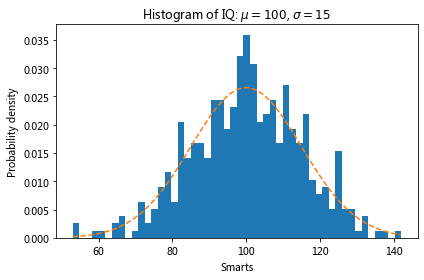

In [45]:
np.random.seed(19680801)

# example data
mu = 100  # mean of distribution
sigma = 15  # standard deviation of distribution
x = mu + sigma * np.random.randn(437)

num_bins = 50

fig, ax = plt.subplots()

# the histogram of the data
n, bins, patches = ax.hist(x, num_bins, density=True)

# add a 'best fit' line
y = ((1 / (np.sqrt(2 * np.pi) * sigma)) *
     np.exp(-0.5 * (1 / sigma * (bins - mu))**2))
ax.plot(bins, y, '--')
ax.set_xlabel('Smarts')
ax.set_ylabel('Probability density')
ax.set_title(r'Histogram of IQ: $\mu=100$, $\sigma=15$')

# Tweak spacing to prevent clipping of ylabel
fig.tight_layout()
# plt.show()

<h1>PathPatch object</h1>
This example shows how to create Path and PathPatch objects(Just like front-end)through Matplotlib's API.

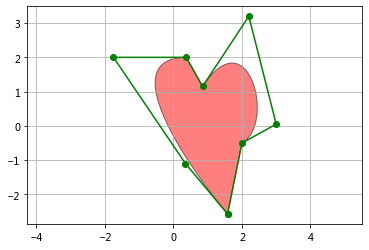

In [48]:
import matplotlib.path as mpath
import matplotlib.patches as mpatches

fig, ax = plt.subplots()

Path = mpath.Path
path_data = [
    (Path.MOVETO, (1.58, -2.57)),
    (Path.CURVE4, (0.35, -1.1)),
    (Path.CURVE4, (-1.75, 2.0)),
    (Path.CURVE4, (0.375, 2.0)),
    (Path.LINETO, (0.85, 1.15)),
    (Path.CURVE4, (2.2, 3.2)),
    (Path.CURVE4, (3, 0.05)),
    (Path.CURVE4, (2.0, -0.5)),
    (Path.CLOSEPOLY, (1.58, -2.57)),
    ]
codes, verts = zip(*path_data)  # Pass path_data as a sperate list install of a whole
path = mpath.Path(verts, codes)
patch = mpatches.PathPatch(path, facecolor='r', alpha=0.5)
ax.add_patch(patch)

# plot control points and connecting lines
x, y = zip(*path.vertices)  # Get vector
line, = ax.plot(x, y, 'go-')
# "go-" means green, point, solid line

ax.grid()
ax.axis('equal')
plt.show()